<a href="https://colab.research.google.com/github/oak2905/ae/blob/main/aeproj_bvar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **India**

In [74]:
data = pd.read_csv('/content/drive/MyDrive/ae/data_f.csv')
data

Date  World_oil_prod  Real_price_oil  glob_eco_act     usdinr  \
0   2002q1     58288.87743       19.190000     88.685133  48.612267   
1   2002q2     58037.14403       23.956667     90.054700  48.979800   
2   2002q3     58477.81643       25.936667     90.610367  48.621733   
3   2002q4     60047.26377       25.450000     90.563867  48.274333   
4   2003q1     62571.27620       30.586667     91.130533  47.793733   
..     ...             ...             ...           ...        ...   
79  2021q4     63466.87490       73.590000    100.795867  74.930600   
80  2022q1     64271.99503       89.630000    101.725767  75.188867   
81  2022q2     63778.23137      107.180000    102.752833  77.185067   
82  2022q3     64812.70177       91.726667    103.298500  79.783933   
83  2022q4     65167.37963       78.153333    102.653133  82.148600   

        usdyen   usdyuan       wui     china_gdp     india_gdp     japan_gdp  
0   132.462300  8.277033  22597.36  3.176680e+11  2.208680e+11  3.614990e+12  
1   126.812433  8.276967  17938.45  3.527010e+11  2.219220e+11  3.873500e+12  
2   119.323267  8.276833  14136.45  3.776180e+11  2.215830e+11  4.100360e+12  
3   122.469500  8.277367  27832.88  4.224740e+11  2.207090e+11  4.111520e+12  
4   118.946100  8.277600  25718.62  3.603200e+11  2.248930e+11  4.114920e+12  
..         ...       ...       ...           ...           ...           ...  
79  113.639800  6.391800  19802.65  5.027450e+12  5.177110e+11  4.804880e+12  
80  116.226400  6.347933  26455.02  4.154440e+12  5.250090e+11  4.919140e+12  
81  129.728267  6.608400  29343.64  4.525040e+12  5.258570e+11  5.040850e+12  
82  138.425600  6.851800  24504.76  4.799950e+12  5.307550e+11  5.079840e+12  
83  141.470433  7.114367  26500.43  5.246490e+12  5.222230e+11  5.097440e+12  

[84 rows x 11 columns]

In [75]:
data =  data.drop(['usdyen'],axis = 1)
data =  data.drop(['usdyuan'],axis = 1)
data =  data.drop(['china_gdp'],axis = 1)
data =  data.drop(['japan_gdp'],axis = 1)
data

Date  World_oil_prod  Real_price_oil  glob_eco_act     usdinr       wui  \
0   2002q1     58288.87743       19.190000     88.685133  48.612267  22597.36   
1   2002q2     58037.14403       23.956667     90.054700  48.979800  17938.45   
2   2002q3     58477.81643       25.936667     90.610367  48.621733  14136.45   
3   2002q4     60047.26377       25.450000     90.563867  48.274333  27832.88   
4   2003q1     62571.27620       30.586667     91.130533  47.793733  25718.62   
..     ...             ...             ...           ...        ...       ...   
79  2021q4     63466.87490       73.590000    100.795867  74.930600  19802.65   
80  2022q1     64271.99503       89.630000    101.725767  75.188867  26455.02   
81  2022q2     63778.23137      107.180000    102.752833  77.185067  29343.64   
82  2022q3     64812.70177       91.726667    103.298500  79.783933  24504.76   
83  2022q4     65167.37963       78.153333    102.653133  82.148600  26500.43   

       india_gdp  
0   2.208680e+11  
1   2.219220e+11  
2   2.215830e+11  
3   2.207090e+11  
4   2.248930e+11  
..           ...  
79  5.177110e+11  
80  5.250090e+11  
81  5.258570e+11  
82  5.307550e+11  
83  5.222230e+11  

[84 rows x 7 columns]

In [76]:
data = data.drop(['Date'],axis = 1)
data = np.log(data) - np.log(data.shift(1))
data = data[1:]
data

World_oil_prod  Real_price_oil  glob_eco_act    usdinr       wui  \
1        -0.004328        0.221857      0.015325  0.007532 -0.230887   
2         0.007564        0.079411      0.006151 -0.007337 -0.238190   
3         0.026485       -0.018942     -0.000513 -0.007171  0.677461   
4         0.041174        0.183848      0.006238 -0.010005 -0.079003   
5         0.040219       -0.177321     -0.007469 -0.015327  0.292434   
..             ...             ...           ...       ...       ...   
79        0.035895        0.074599      0.010230  0.011191 -0.082635   
80        0.012606        0.197181      0.009183  0.003441  0.289630   
81       -0.007712        0.178820      0.010046  0.026203  0.103630   
82        0.016090       -0.155697      0.005296  0.033116 -0.180208   
83        0.005457       -0.160140     -0.006267  0.029208  0.078294   

    india_gdp  
1    0.004761  
2   -0.001529  
3   -0.003952  
4    0.018780  
5    0.032612  
..        ...  
79   0.023786  
80   0.013998  
81   0.001614  
82   0.009271  
83  -0.016206  

[83 rows x 6 columns]

In [77]:
import pymc as pm
import arviz as az
az.style.use("arviz-darkgrid")
seed = sum(map(ord, "PyMC LABS - BVAR"))
rng = np.random.default_rng(seed=seed)

In [78]:
train_data = data[:60]
test_data = data[60:]
train_data.shape, test_data.shape

((60, 6), (23, 6))

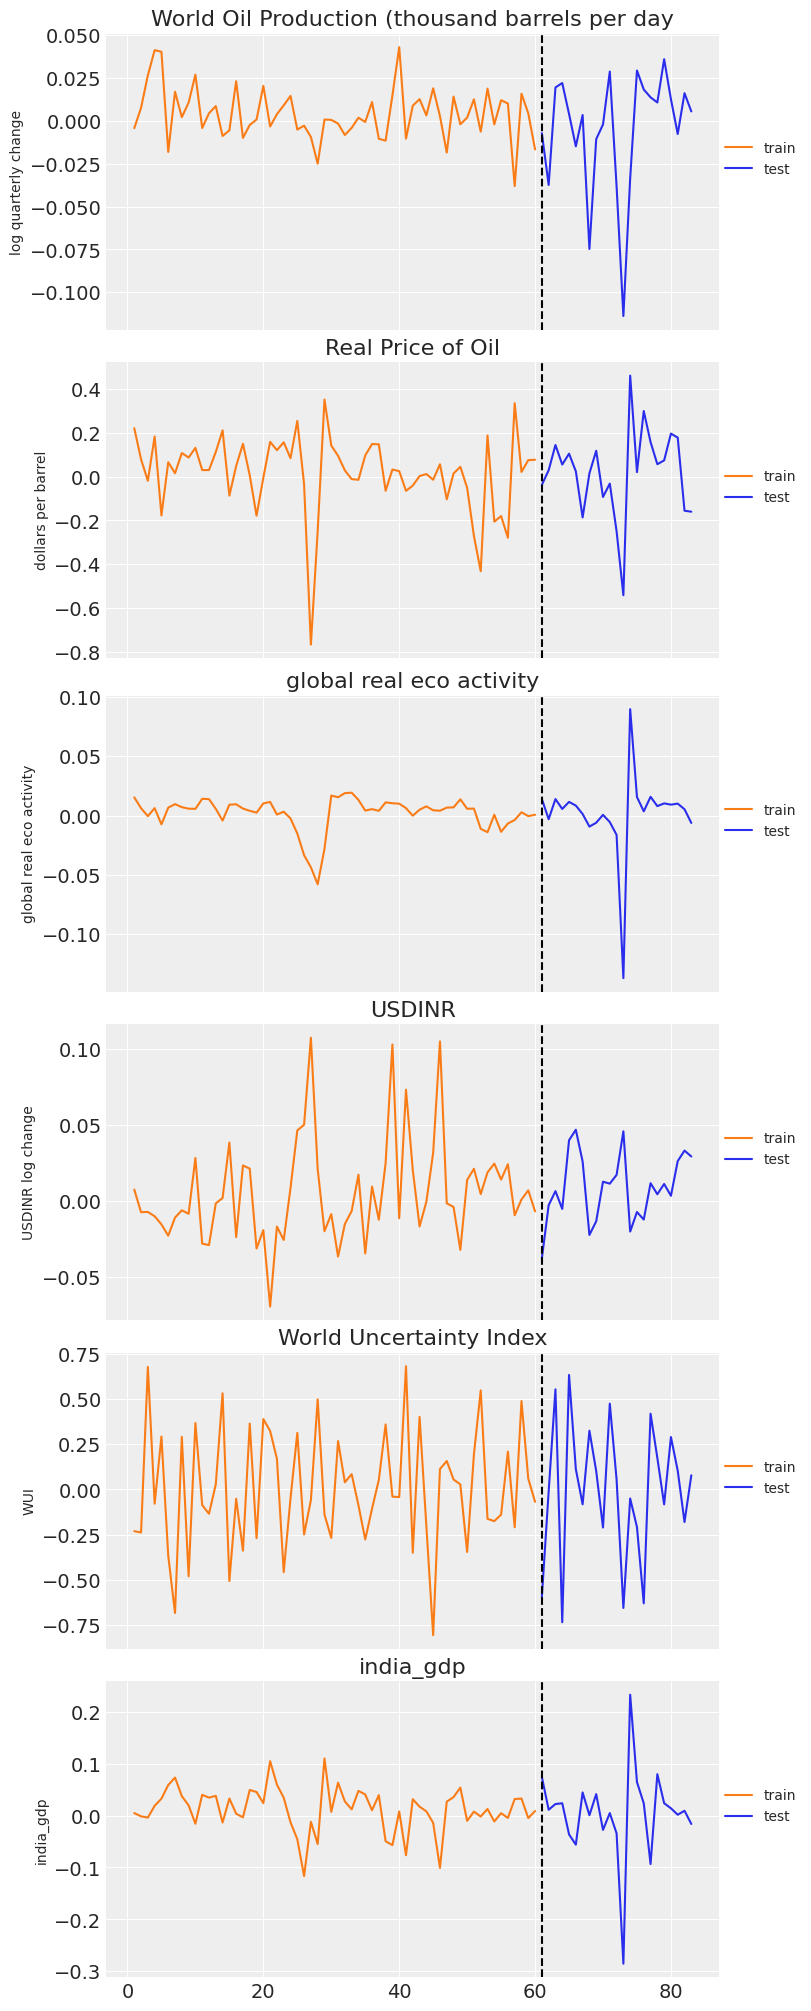

In [79]:
_, ax = plt.subplots(6, 1, figsize=(8, 20), sharex=True)
ax[0].plot(train_data[train_data.columns[0]], color="C1", label="train")
ax[0].plot(test_data[test_data.columns[0]], color="C0", label="test")
ax[0].set_ylabel("log quarterly change", fontsize=10)
ax[0].set_title("World Oil Production (thousand barrels per day")

ax[1].plot(train_data[train_data.columns[1]], color="C1", label="train")
ax[1].plot(test_data[test_data.columns[1]], color="C0", label="test")
ax[1].set_ylabel("dollars per barrel", fontsize=10)
ax[1].set_title("Real Price of Oil")

ax[2].plot(train_data[train_data.columns[2]], color="C1", label="train")
ax[2].plot(test_data[test_data.columns[2]], color="C0", label="test")
ax[2].set_ylabel("global real eco activity", fontsize=10)
ax[2].set_title("global real eco activity")

ax[3].plot(train_data[train_data.columns[3]], color="C1", label="train")
ax[3].plot(test_data[test_data.columns[3]], color="C0", label="test")
ax[3].set_ylabel("USDINR log change", fontsize=10)
ax[3].set_title("USDINR")

ax[4].plot(train_data[train_data.columns[4]], color="C1", label="train")
ax[4].plot(test_data[test_data.columns[4]], color="C0", label="test")
ax[4].set_ylabel("WUI", fontsize=10)
ax[4].set_title("World Uncertainty Index")

ax[5].plot(train_data[train_data.columns[5]], color="C1", label="train")
ax[5].plot(test_data[test_data.columns[5]], color="C0", label="test")
ax[5].set_ylabel("india_gdp", fontsize=10)
ax[5].set_title("india_gdp")

for axi in ax:
    axi.axvline(data.index[60], ls="--", color="k")
    axi.legend(loc=(1, 0.5), fontsize=10)

In [80]:
data.columns

Index(['World_oil_prod', 'Real_price_oil', 'glob_eco_act', 'usdinr', 'wui',
       'india_gdp'],
      dtype='object')

In [81]:
lags = 4

coords={
    "lags": reversed(range(-lags, 0)),
    "vars": ("World_oil_prod", "Real_price_oil",'glob_eco_act','usdinr',
             'wui', 'india_gdp'),
    "cross_vars": ("World_oil_prod", "Real_price_oil",'glob_eco_act','usdinr',
             'wui', 'india_gdp'),
    "time": range(len(train_data) - lags),
}

with pm.Model(coords=coords) as BVAR_model:
    # The first B bit:
    # Priors for the model intercept, lagged coefficients and noise terms
    intercept = pm.Normal("intercept", mu=0, sigma=0.1, dims=("vars",))
    lag_coefs = pm.Normal("lag_coefs", mu=0, sigma=0.1, dims=("lags", "vars", "cross_vars"))
    noise = pm.HalfNormal("noise", dims=("vars",))

    # The VAR bit:
    # Compute autoregressive expectation for each variable
    # We convolve the lagged coefficients of each variable with the whole dataset
    ar_oilprod= pm.math.sum([
        pm.math.sum(lag_coefs[i, 0] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0)        
    ar_realprice = pm.math.sum([
        pm.math.sum(lag_coefs[i, 1] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0)   
    ar_ecoact = pm.math.sum([
        pm.math.sum(lag_coefs[i, 2] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_usdinr = pm.math.sum([
        pm.math.sum(lag_coefs[i, 3] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_wui = pm.math.sum([
        pm.math.sum(lag_coefs[i, 4] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_indiagdp = pm.math.sum([
        pm.math.sum(lag_coefs[i, 5] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    # Stack autoregressive terms and add intercepts
    mean = intercept + pm.math.stack([ar_oilprod, ar_realprice, ar_ecoact, ar_usdinr,ar_wui,  ar_indiagdp], axis=-1)

    # The second B bit:
    # For modelling simplicity, we ignore the first observations, where we could
    # not observe the effects of all the lagged coefficients
    obs = pm.Normal("obs", mu=mean, sigma=noise, observed=train_data[lags:], dims=("time", "vars"))

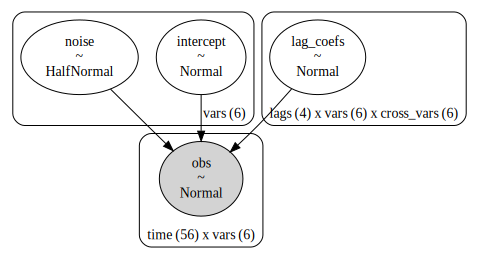

In [82]:
pm.model_to_graphviz(BVAR_model)

In [83]:
with BVAR_model:
    trace = pm.sample(chains=2, random_seed=100)

array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'lag_coefs'}>,
        <Axes: title={'center': 'lag_coefs'}>],
       [<Axes: title={'center': 'noise'}>,
        <Axes: title={'center': 'noise'}>]], dtype=object)

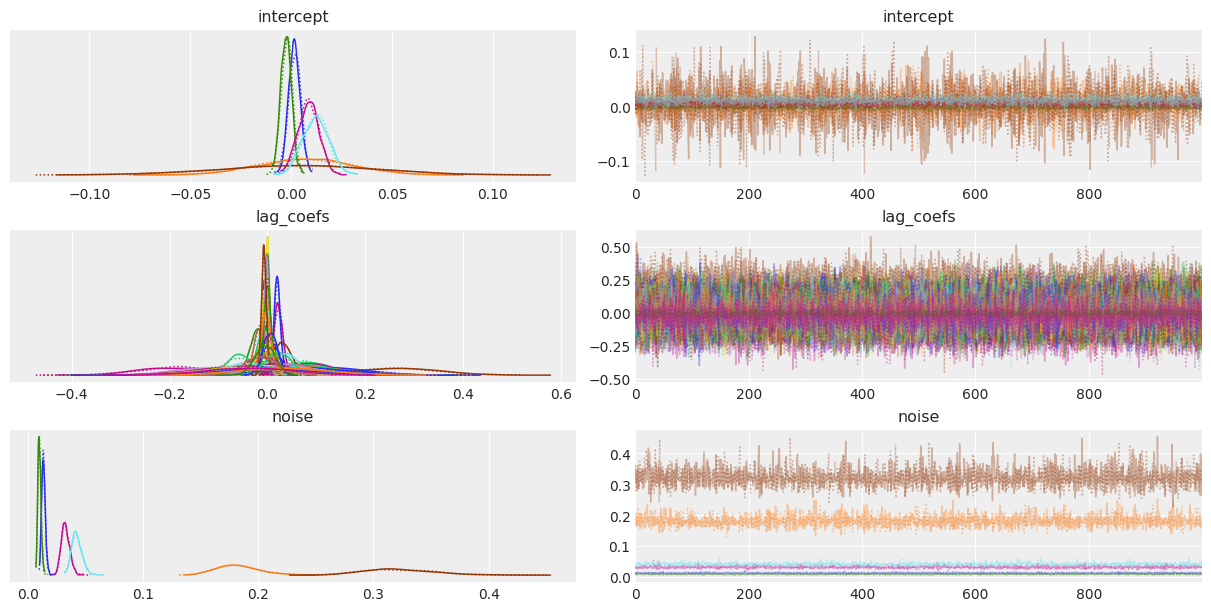

In [84]:
az.plot_trace(trace)

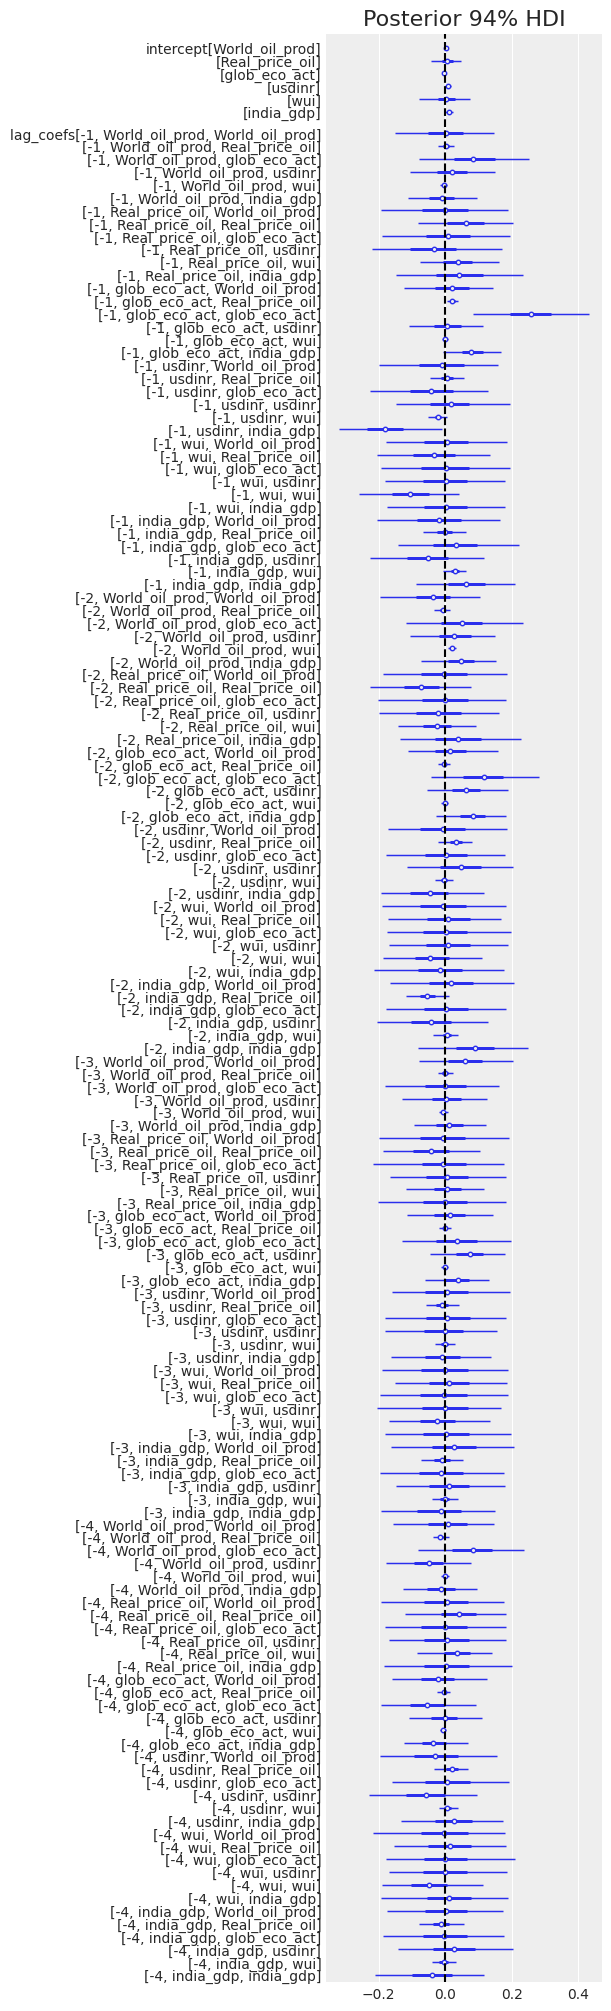

In [85]:
az.plot_forest(trace, var_names=["intercept", "lag_coefs"], combined=True, textsize=10)
plt.axvline(0, color="k", ls="--")
plt.title("Posterior 94% HDI");

In [86]:
(az.summary(trace)).to_csv("/content/drive/MyDrive/ae/summary_india.csv")

In [87]:
# Take a random subset of 100 draws from the posterior
draws = rng.integers(1000, size=100)

post = trace.posterior.stack(sample=("chain", "draw"))
intercept_draws = post["intercept"].values.T[draws]

lag_coefs_draws = post["lag_coefs"].values.T[draws].T
lag_coefs_draws = np.moveaxis(lag_coefs_draws, -1, 0)

noise_draws = post["noise"].values.T[draws]

intercept_draws.shape, lag_coefs_draws.shape, noise_draws.shape

((100, 6), (100, 4, 6, 6), (100, 6))

In [92]:
# Function that takes a single draw of parameters and forecasts n steps
def _forecast(intercept, lag_coefs, noise, forecast=24):
  
    len_data = len(train_data)
    new_draws = np.zeros((train_data.shape[0]+forecast, train_data.shape[1]))
    # Fill the new array with the observed data
    new_draws[:len_data] = train_data[:]
    for i in range(forecast):
        ar_oilprod = np.sum(lag_coefs[:, 0] * new_draws[len_data+i-lags: len_data+i])
        ar_realprice = np.sum(lag_coefs[:, 1] * new_draws[len_data+i-lags: len_data+i])
        ar_ecoact = np.sum(lag_coefs[:, 2] * new_draws[len_data+i-lags: len_data+i])
        ar_usdinr = np.sum(lag_coefs[:, 3] * new_draws[len_data+i-lags: len_data+i])
        ar_wui = np.sum(lag_coefs[:, 4] * new_draws[len_data+i-lags: len_data+i])
        ar_indiagdp = np.sum(lag_coefs[:, 5] * new_draws[len_data+i-lags: len_data+i])
        mean = intercept + np.stack([ar_oilprod, ar_realprice, ar_ecoact, ar_usdinr, ar_wui,ar_indiagdp])
        new_draws[len_data+i] = rng.normal(mean, noise)
    # Replace all observed data with nan, so they don't show when we plot it
    new_draws[:-forecast-1] = np.nan
    
    return new_draws

# Vectorized forecast function to handle multiple parameter draws
forecast = np.vectorize(
    _forecast,
    signature=("(v),(l,v,v),(v)->(o,v)"),
    excluded=("forecast",),
)

In [93]:
# Forecast 23 quarters into the future
ppc_draws = forecast(intercept_draws, lag_coefs_draws, noise_draws, forecast=23)
ppc_draws = np.swapaxes(ppc_draws, 0, 1)
ppc_draws.shape


(83, 100, 6)

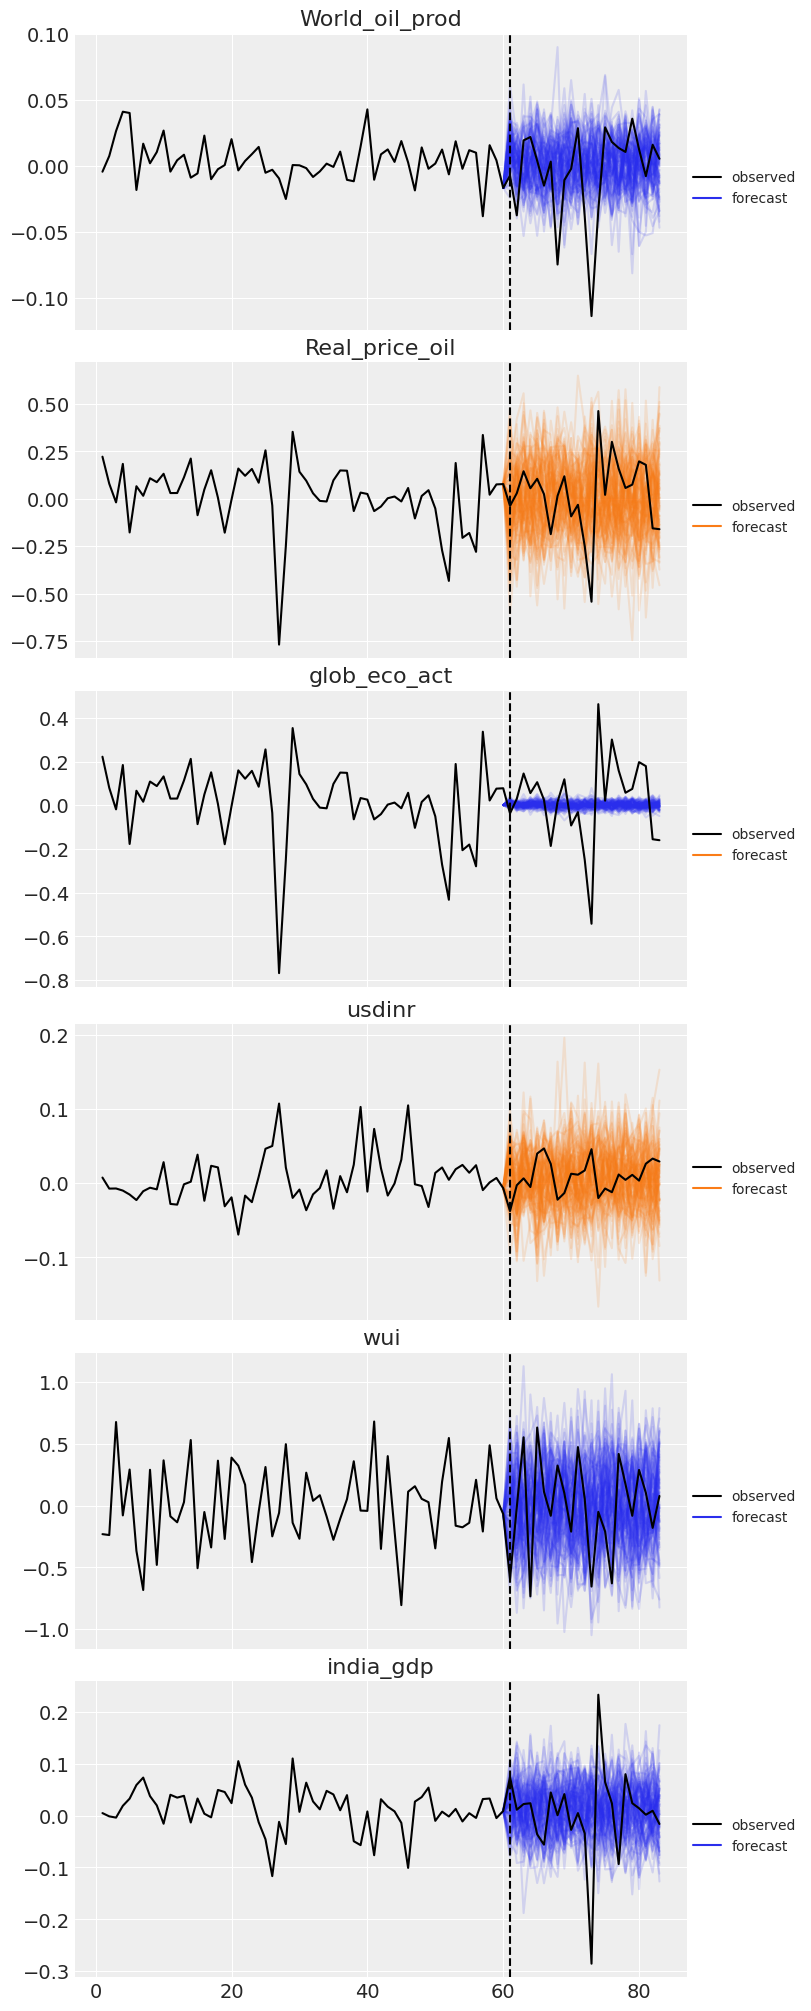

In [94]:
_, ax = plt.subplots(6, 1, sharex=True, figsize = (8,20))

ax[0].set_title('World_oil_prod')
ax[0].plot(data.index, ppc_draws[..., 0], color="C0", alpha=0.15)
ax[0].plot(data['World_oil_prod'], color="k", label="observed")
ax[0].plot([], color="C0", label="forecast")

ax[1].set_title('Real_price_oil')
ax[1].plot(data.index, ppc_draws[..., 1], color="C1", alpha=0.15)
ax[1].plot(data["Real_price_oil"], color="k", label="observed")
ax[1].plot([], color="C1", label="forecast")

ax[2].set_title('glob_eco_act')
ax[2].plot(data.index, ppc_draws[..., 2], color="C0", alpha=0.15)
ax[2].plot(data["Real_price_oil"], color="k", label="observed")
ax[2].plot([], color="C1", label="forecast")

ax[3].set_title('usdinr')
ax[3].plot(data.index, ppc_draws[..., 3], color="C1", alpha=0.15)
ax[3].plot(data["usdinr"], color="k", label="observed")
ax[3].plot([], color="C1", label="forecast")

ax[4].set_title('wui')
ax[4].plot(data.index, ppc_draws[..., 4], color="C0", alpha=0.15)
ax[4].plot(data["wui"], color="k", label="observed")
ax[4].plot([], color="C0", label="forecast")

ax[5].set_title('india_gdp')
ax[5].plot(data.index, ppc_draws[..., 5], color="C0", alpha=0.15)
ax[5].plot(data["india_gdp"], color="k", label="observed")
ax[5].plot([], color="C0", label="forecast")

for axi in ax:
    axi.axvline(test_data.index[0], ls="--", color="k")
    axi.legend(fontsize=10, loc=(1, .4))

## **China**

In [98]:
data = pd.read_csv('/content/drive/MyDrive/ae/data_f.csv')
data

Date  World_oil_prod  Real_price_oil  glob_eco_act     usdinr  \
0   2002q1     58288.87743       19.190000     88.685133  48.612267   
1   2002q2     58037.14403       23.956667     90.054700  48.979800   
2   2002q3     58477.81643       25.936667     90.610367  48.621733   
3   2002q4     60047.26377       25.450000     90.563867  48.274333   
4   2003q1     62571.27620       30.586667     91.130533  47.793733   
..     ...             ...             ...           ...        ...   
79  2021q4     63466.87490       73.590000    100.795867  74.930600   
80  2022q1     64271.99503       89.630000    101.725767  75.188867   
81  2022q2     63778.23137      107.180000    102.752833  77.185067   
82  2022q3     64812.70177       91.726667    103.298500  79.783933   
83  2022q4     65167.37963       78.153333    102.653133  82.148600   

        usdyen   usdyuan       wui     china_gdp     india_gdp     japan_gdp  
0   132.462300  8.277033  22597.36  3.176680e+11  2.208680e+11  3.614990e+12  
1   126.812433  8.276967  17938.45  3.527010e+11  2.219220e+11  3.873500e+12  
2   119.323267  8.276833  14136.45  3.776180e+11  2.215830e+11  4.100360e+12  
3   122.469500  8.277367  27832.88  4.224740e+11  2.207090e+11  4.111520e+12  
4   118.946100  8.277600  25718.62  3.603200e+11  2.248930e+11  4.114920e+12  
..         ...       ...       ...           ...           ...           ...  
79  113.639800  6.391800  19802.65  5.027450e+12  5.177110e+11  4.804880e+12  
80  116.226400  6.347933  26455.02  4.154440e+12  5.250090e+11  4.919140e+12  
81  129.728267  6.608400  29343.64  4.525040e+12  5.258570e+11  5.040850e+12  
82  138.425600  6.851800  24504.76  4.799950e+12  5.307550e+11  5.079840e+12  
83  141.470433  7.114367  26500.43  5.246490e+12  5.222230e+11  5.097440e+12  

[84 rows x 11 columns]

In [99]:
data =  data.drop(['usdinr'],axis = 1)
data =  data.drop(['usdyen'],axis = 1)
data =  data.drop(['india_gdp'],axis = 1)
data =  data.drop(['japan_gdp'],axis = 1)
data

Date  World_oil_prod  Real_price_oil  glob_eco_act   usdyuan       wui  \
0   2002q1     58288.87743       19.190000     88.685133  8.277033  22597.36   
1   2002q2     58037.14403       23.956667     90.054700  8.276967  17938.45   
2   2002q3     58477.81643       25.936667     90.610367  8.276833  14136.45   
3   2002q4     60047.26377       25.450000     90.563867  8.277367  27832.88   
4   2003q1     62571.27620       30.586667     91.130533  8.277600  25718.62   
..     ...             ...             ...           ...       ...       ...   
79  2021q4     63466.87490       73.590000    100.795867  6.391800  19802.65   
80  2022q1     64271.99503       89.630000    101.725767  6.347933  26455.02   
81  2022q2     63778.23137      107.180000    102.752833  6.608400  29343.64   
82  2022q3     64812.70177       91.726667    103.298500  6.851800  24504.76   
83  2022q4     65167.37963       78.153333    102.653133  7.114367  26500.43   

       china_gdp  
0   3.176680e+11  
1   3.527010e+11  
2   3.776180e+11  
3   4.224740e+11  
4   3.603200e+11  
..           ...  
79  5.027450e+12  
80  4.154440e+12  
81  4.525040e+12  
82  4.799950e+12  
83  5.246490e+12  

[84 rows x 7 columns]

In [100]:
data.columns

Index(['Date', 'World_oil_prod', 'Real_price_oil', 'glob_eco_act', 'usdyuan',
       'wui', 'china_gdp'],
      dtype='object')

In [101]:
data = data.drop(['Date'],axis = 1)
data = np.log(data) - np.log(data.shift(1))
data = data[1:]
data

World_oil_prod  Real_price_oil  glob_eco_act   usdyuan       wui  \
1        -0.004328        0.221857      0.015325 -0.000008 -0.230887   
2         0.007564        0.079411      0.006151 -0.000016 -0.238190   
3         0.026485       -0.018942     -0.000513  0.000064  0.677461   
4         0.041174        0.183848      0.006238  0.000028 -0.079003   
5         0.040219       -0.177321     -0.007469 -0.000064  0.292434   
..             ...             ...           ...       ...       ...   
79        0.035895        0.074599      0.010230 -0.012129 -0.082635   
80        0.012606        0.197181      0.009183 -0.006887  0.289630   
81       -0.007712        0.178820      0.010046  0.040212  0.103630   
82        0.016090       -0.155697      0.005296  0.036170 -0.180208   
83        0.005457       -0.160140     -0.006267  0.037605  0.078294   

    china_gdp  
1    0.104614  
2    0.068262  
3    0.112245  
4   -0.159135  
5    0.087023  
..        ...  
79   0.106908  
80  -0.190735  
81   0.085449  
82   0.058979  
83   0.088954  

[83 rows x 6 columns]

In [102]:
import pymc as pm
import arviz as az
az.style.use("arviz-darkgrid")
seed = sum(map(ord, "PyMC LABS - BVAR"))
rng = np.random.default_rng(seed=seed)

In [103]:
train_data = data[:60]
test_data = data[60:]
train_data.shape, test_data.shape

((60, 6), (23, 6))

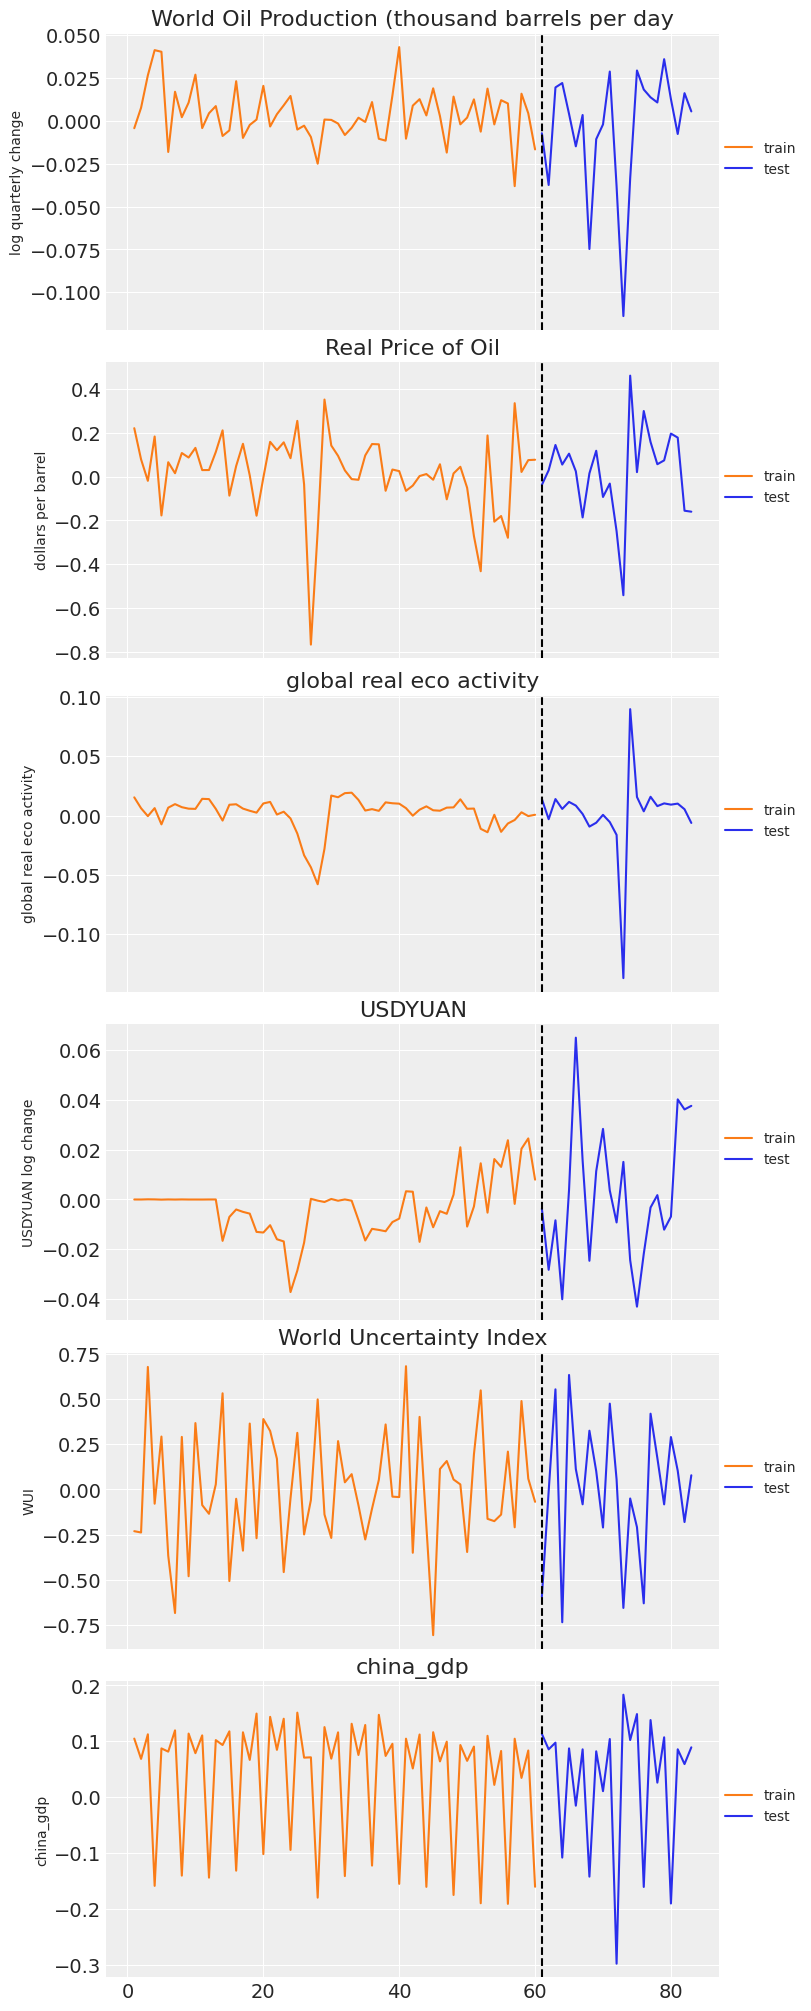

In [104]:
_, ax = plt.subplots(6, 1, figsize=(8, 20), sharex=True)
ax[0].plot(train_data[train_data.columns[0]], color="C1", label="train")
ax[0].plot(test_data[test_data.columns[0]], color="C0", label="test")
ax[0].set_ylabel("log quarterly change", fontsize=10)
ax[0].set_title("World Oil Production (thousand barrels per day")

ax[1].plot(train_data[train_data.columns[1]], color="C1", label="train")
ax[1].plot(test_data[test_data.columns[1]], color="C0", label="test")
ax[1].set_ylabel("dollars per barrel", fontsize=10)
ax[1].set_title("Real Price of Oil")

ax[2].plot(train_data[train_data.columns[2]], color="C1", label="train")
ax[2].plot(test_data[test_data.columns[2]], color="C0", label="test")
ax[2].set_ylabel("global real eco activity", fontsize=10)
ax[2].set_title("global real eco activity")

ax[3].plot(train_data[train_data.columns[3]], color="C1", label="train")
ax[3].plot(test_data[test_data.columns[3]], color="C0", label="test")
ax[3].set_ylabel("USDYUAN log change", fontsize=10)
ax[3].set_title("USDYUAN")

ax[4].plot(train_data[train_data.columns[4]], color="C1", label="train")
ax[4].plot(test_data[test_data.columns[4]], color="C0", label="test")
ax[4].set_ylabel("WUI", fontsize=10)
ax[4].set_title("World Uncertainty Index")

ax[5].plot(train_data[train_data.columns[5]], color="C1", label="train")
ax[5].plot(test_data[test_data.columns[5]], color="C0", label="test")
ax[5].set_ylabel("china_gdp", fontsize=10)
ax[5].set_title("china_gdp")

for axi in ax:
    axi.axvline(data.index[60], ls="--", color="k")
    axi.legend(loc=(1, 0.5), fontsize=10)

In [105]:
lags = 4

coords={
    "lags": reversed(range(-lags, 0)),
    "vars": ("World_oil_prod", "Real_price_oil",'glob_eco_act','usdyuan',
             'wui', 'china_gdp'),
    "cross_vars": ("World_oil_prod", "Real_price_oil",'glob_eco_act','usdyuan',
             'wui', 'china_gdp'),
    "time": range(len(train_data) - lags),
}

with pm.Model(coords=coords) as BVAR_model:
    # The first B bit:
    # Priors for the model intercept, lagged coefficients and noise terms
    intercept = pm.Normal("intercept", mu=0, sigma=0.1, dims=("vars",))
    lag_coefs = pm.Normal("lag_coefs", mu=0, sigma=0.1, dims=("lags", "vars", "cross_vars"))
    noise = pm.HalfNormal("noise", dims=("vars",))

    # The VAR bit:
    # Compute autoregressive expectation for each variable
    # We convolve the lagged coefficients of each variable with the whole dataset
    ar_oilprod= pm.math.sum([
        pm.math.sum(lag_coefs[i, 0] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0)        
    ar_realprice = pm.math.sum([
        pm.math.sum(lag_coefs[i, 1] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0)   
    ar_ecoact = pm.math.sum([
        pm.math.sum(lag_coefs[i, 2] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_usdyuan = pm.math.sum([
        pm.math.sum(lag_coefs[i, 3] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_wui = pm.math.sum([
        pm.math.sum(lag_coefs[i, 4] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_chinagdp = pm.math.sum([
        pm.math.sum(lag_coefs[i, 5] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    # Stack autoregressive terms and add intercepts
    mean = intercept + pm.math.stack([ar_oilprod, ar_realprice, ar_ecoact, ar_usdyuan, ar_wui,  ar_chinagdp], axis=-1)

    # The second B bit:
    # For modelling simplicity, we ignore the first observations, where we could
    # not observe the effects of all the lagged coefficients
    obs = pm.Normal("obs", mu=mean, sigma=noise, observed=train_data[lags:], dims=("time", "vars"))

In [106]:
with BVAR_model:
    trace = pm.sample(chains=2, random_seed=100)

array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'lag_coefs'}>,
        <Axes: title={'center': 'lag_coefs'}>],
       [<Axes: title={'center': 'noise'}>,
        <Axes: title={'center': 'noise'}>]], dtype=object)

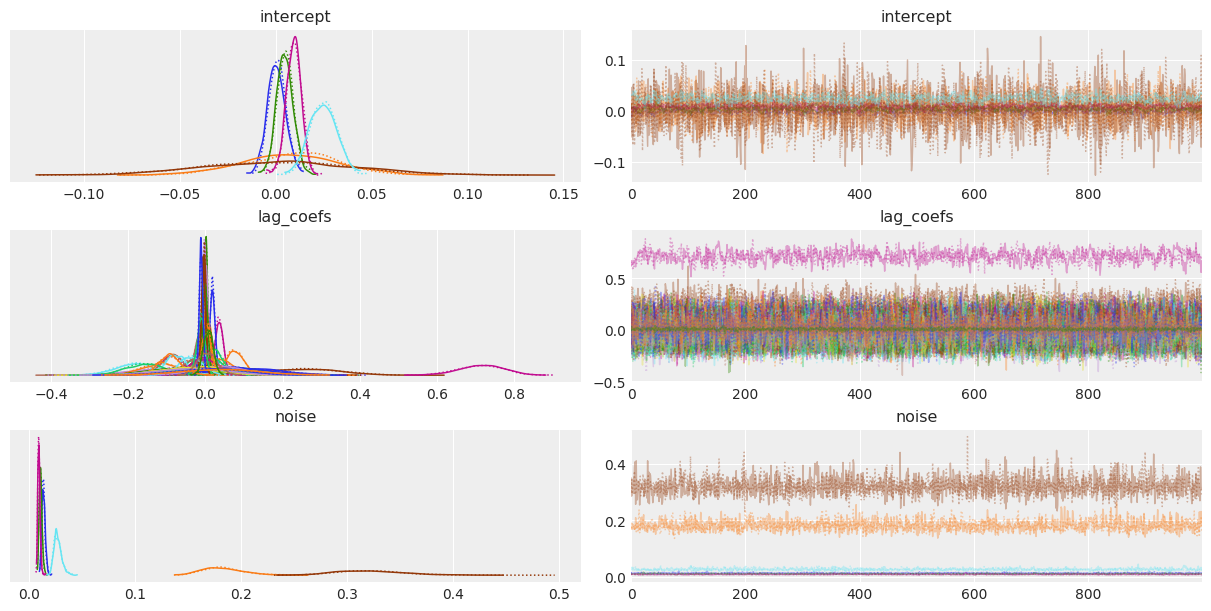

In [107]:
az.plot_trace(trace)

In [108]:
(az.summary(trace)).to_csv("/content/drive/MyDrive/ae/summary_china.csv")

In [109]:
# Take a random subset of 100 draws from the posterior
draws = rng.integers(1000, size=100)

post = trace.posterior.stack(sample=("chain", "draw"))
intercept_draws = post["intercept"].values.T[draws]

lag_coefs_draws = post["lag_coefs"].values.T[draws].T
lag_coefs_draws = np.moveaxis(lag_coefs_draws, -1, 0)

noise_draws = post["noise"].values.T[draws]

intercept_draws.shape, lag_coefs_draws.shape, noise_draws.shape

((100, 6), (100, 4, 6, 6), (100, 6))

In [110]:
# Function that takes a single draw of parameters and forecasts n steps
def _forecast(intercept, lag_coefs, noise, forecast=24):
  
    len_data = len(train_data)
    new_draws = np.zeros((train_data.shape[0]+forecast, train_data.shape[1]))
    # Fill the new array with the observed data
    new_draws[:len_data] = train_data[:]
    for i in range(forecast):
        ar_oilprod = np.sum(lag_coefs[:, 0] * new_draws[len_data+i-lags: len_data+i])
        ar_realprice = np.sum(lag_coefs[:, 1] * new_draws[len_data+i-lags: len_data+i])
        ar_ecoact = np.sum(lag_coefs[:, 2] * new_draws[len_data+i-lags: len_data+i])
        ar_usdyuan = np.sum(lag_coefs[:, 3] * new_draws[len_data+i-lags: len_data+i])
        ar_wui = np.sum(lag_coefs[:, 4] * new_draws[len_data+i-lags: len_data+i])
        ar_chinagdp = np.sum(lag_coefs[:, 5] * new_draws[len_data+i-lags: len_data+i])
        mean = intercept + np.stack([ar_oilprod, ar_realprice, ar_ecoact, ar_usdyuan, ar_wui,ar_chinagdp])
        new_draws[len_data+i] = rng.normal(mean, noise)
    # Replace all observed data with nan, so they don't show when we plot it
    new_draws[:-forecast-1] = np.nan
    
    return new_draws

# Vectorized forecast function to handle multiple parameter draws
forecast = np.vectorize(
    _forecast,
    signature=("(v),(l,v,v),(v)->(o,v)"),
    excluded=("forecast",),
)

In [111]:
# Forecast 23 quarters into the future
ppc_draws = forecast(intercept_draws, lag_coefs_draws, noise_draws, forecast=23)
ppc_draws = np.swapaxes(ppc_draws, 0, 1)
ppc_draws.shape


(83, 100, 6)

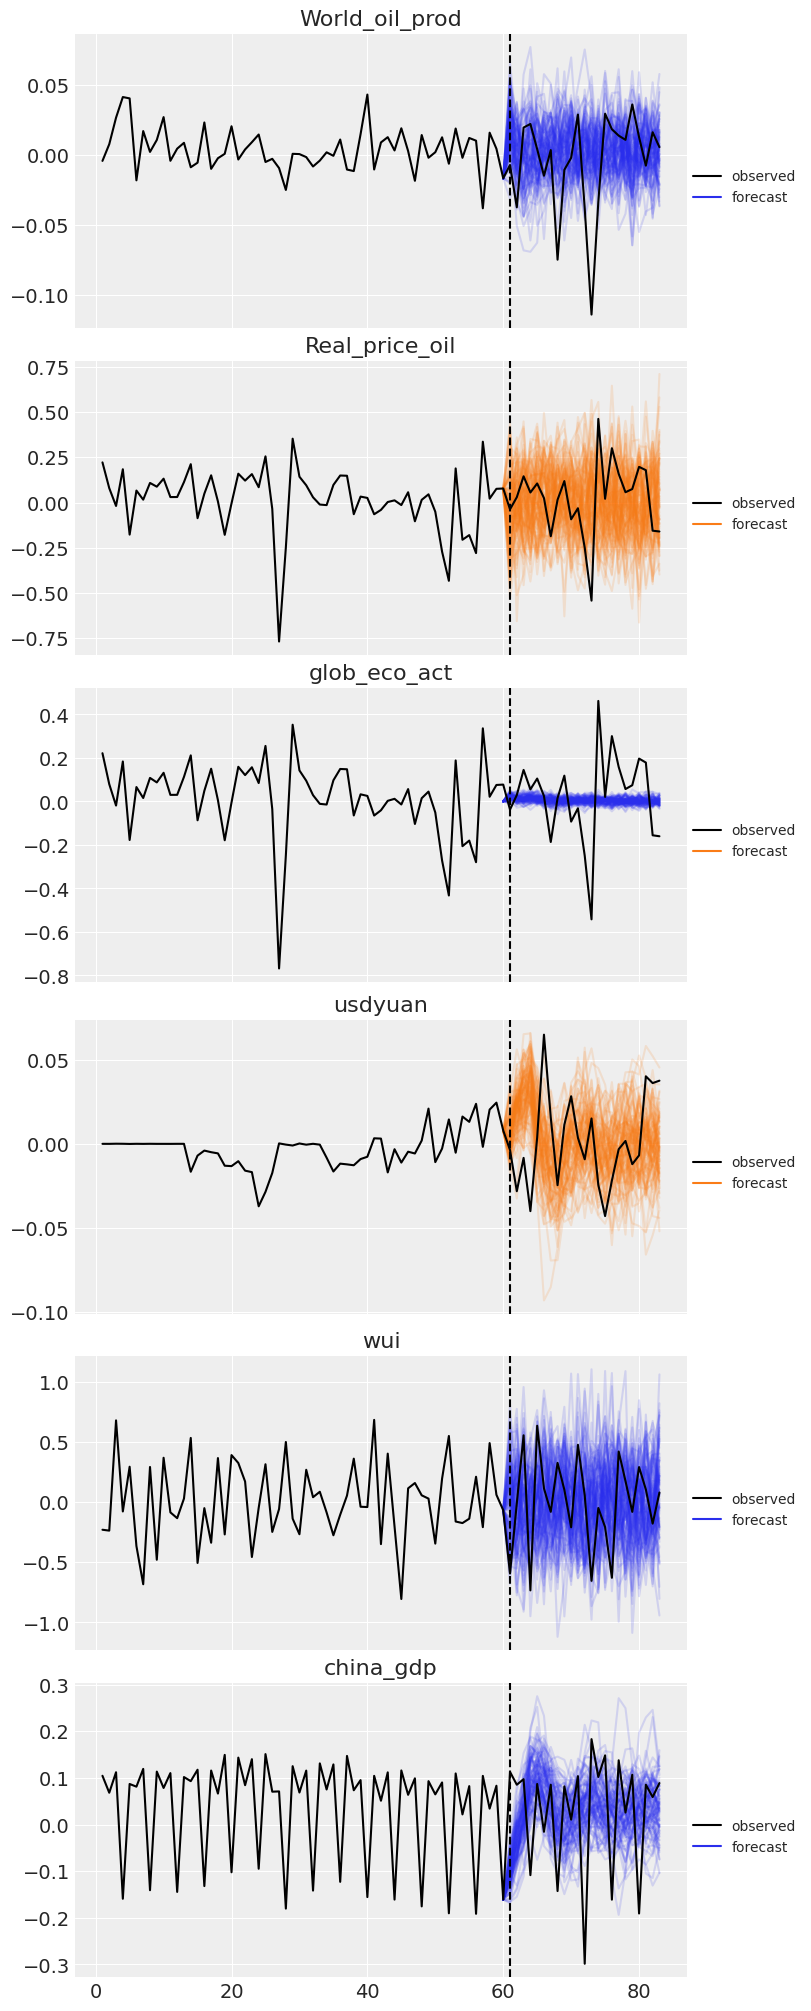

In [112]:
_, ax = plt.subplots(6, 1, sharex=True, figsize = (8,20))

ax[0].set_title('World_oil_prod')
ax[0].plot(data.index, ppc_draws[..., 0], color="C0", alpha=0.15)
ax[0].plot(data['World_oil_prod'], color="k", label="observed")
ax[0].plot([], color="C0", label="forecast")

ax[1].set_title('Real_price_oil')
ax[1].plot(data.index, ppc_draws[..., 1], color="C1", alpha=0.15)
ax[1].plot(data["Real_price_oil"], color="k", label="observed")
ax[1].plot([], color="C1", label="forecast")

ax[2].set_title('glob_eco_act')
ax[2].plot(data.index, ppc_draws[..., 2], color="C0", alpha=0.15)
ax[2].plot(data["Real_price_oil"], color="k", label="observed")
ax[2].plot([], color="C1", label="forecast")

ax[3].set_title('usdyuan')
ax[3].plot(data.index, ppc_draws[..., 3], color="C1", alpha=0.15)
ax[3].plot(data["usdyuan"], color="k", label="observed")
ax[3].plot([], color="C1", label="forecast")

ax[4].set_title('wui')
ax[4].plot(data.index, ppc_draws[..., 4], color="C0", alpha=0.15)
ax[4].plot(data["wui"], color="k", label="observed")
ax[4].plot([], color="C0", label="forecast")

ax[5].set_title('china_gdp')
ax[5].plot(data.index, ppc_draws[..., 5], color="C0", alpha=0.15)
ax[5].plot(data["china_gdp"], color="k", label="observed")
ax[5].plot([], color="C0", label="forecast")

for axi in ax:
    axi.axvline(test_data.index[0], ls="--", color="k")
    axi.legend(fontsize=10, loc=(1, .4))

## **Japan**

In [113]:
data = pd.read_csv('/content/drive/MyDrive/ae/data_f.csv')
data

Date  World_oil_prod  Real_price_oil  glob_eco_act     usdinr  \
0   2002q1     58288.87743       19.190000     88.685133  48.612267   
1   2002q2     58037.14403       23.956667     90.054700  48.979800   
2   2002q3     58477.81643       25.936667     90.610367  48.621733   
3   2002q4     60047.26377       25.450000     90.563867  48.274333   
4   2003q1     62571.27620       30.586667     91.130533  47.793733   
..     ...             ...             ...           ...        ...   
79  2021q4     63466.87490       73.590000    100.795867  74.930600   
80  2022q1     64271.99503       89.630000    101.725767  75.188867   
81  2022q2     63778.23137      107.180000    102.752833  77.185067   
82  2022q3     64812.70177       91.726667    103.298500  79.783933   
83  2022q4     65167.37963       78.153333    102.653133  82.148600   

        usdyen   usdyuan       wui     china_gdp     india_gdp     japan_gdp  
0   132.462300  8.277033  22597.36  3.176680e+11  2.208680e+11  3.614990e+12  
1   126.812433  8.276967  17938.45  3.527010e+11  2.219220e+11  3.873500e+12  
2   119.323267  8.276833  14136.45  3.776180e+11  2.215830e+11  4.100360e+12  
3   122.469500  8.277367  27832.88  4.224740e+11  2.207090e+11  4.111520e+12  
4   118.946100  8.277600  25718.62  3.603200e+11  2.248930e+11  4.114920e+12  
..         ...       ...       ...           ...           ...           ...  
79  113.639800  6.391800  19802.65  5.027450e+12  5.177110e+11  4.804880e+12  
80  116.226400  6.347933  26455.02  4.154440e+12  5.250090e+11  4.919140e+12  
81  129.728267  6.608400  29343.64  4.525040e+12  5.258570e+11  5.040850e+12  
82  138.425600  6.851800  24504.76  4.799950e+12  5.307550e+11  5.079840e+12  
83  141.470433  7.114367  26500.43  5.246490e+12  5.222230e+11  5.097440e+12  

[84 rows x 11 columns]

In [114]:
data =  data.drop(['usdinr'],axis = 1)
data =  data.drop(['usdyuan'],axis = 1)
data =  data.drop(['india_gdp'],axis = 1)
data =  data.drop(['china_gdp'],axis = 1)
data

Date  World_oil_prod  Real_price_oil  glob_eco_act      usdyen  \
0   2002q1     58288.87743       19.190000     88.685133  132.462300   
1   2002q2     58037.14403       23.956667     90.054700  126.812433   
2   2002q3     58477.81643       25.936667     90.610367  119.323267   
3   2002q4     60047.26377       25.450000     90.563867  122.469500   
4   2003q1     62571.27620       30.586667     91.130533  118.946100   
..     ...             ...             ...           ...         ...   
79  2021q4     63466.87490       73.590000    100.795867  113.639800   
80  2022q1     64271.99503       89.630000    101.725767  116.226400   
81  2022q2     63778.23137      107.180000    102.752833  129.728267   
82  2022q3     64812.70177       91.726667    103.298500  138.425600   
83  2022q4     65167.37963       78.153333    102.653133  141.470433   

         wui     japan_gdp  
0   22597.36  3.614990e+12  
1   17938.45  3.873500e+12  
2   14136.45  4.100360e+12  
3   27832.88  4.111520e+12  
4   25718.62  4.114920e+12  
..       ...           ...  
79  19802.65  4.804880e+12  
80  26455.02  4.919140e+12  
81  29343.64  5.040850e+12  
82  24504.76  5.079840e+12  
83  26500.43  5.097440e+12  

[84 rows x 7 columns]

In [115]:
data.columns

Index(['Date', 'World_oil_prod', 'Real_price_oil', 'glob_eco_act', 'usdyen',
       'wui', 'japan_gdp'],
      dtype='object')

In [116]:
data = data.drop(['Date'],axis = 1)
data = np.log(data) - np.log(data.shift(1))
data = data[1:]
data

World_oil_prod  Real_price_oil  glob_eco_act    usdyen       wui  \
1        -0.004328        0.221857      0.015325 -0.043589 -0.230887   
2         0.007564        0.079411      0.006151 -0.060873 -0.238190   
3         0.026485       -0.018942     -0.000513  0.026026  0.677461   
4         0.041174        0.183848      0.006238 -0.029192 -0.079003   
5         0.040219       -0.177321     -0.007469 -0.003498  0.292434   
..             ...             ...           ...       ...       ...   
79        0.035895        0.074599      0.010230  0.031863 -0.082635   
80        0.012606        0.197181      0.009183  0.022506  0.289630   
81       -0.007712        0.178820      0.010046  0.109902  0.103630   
82        0.016090       -0.155697      0.005296  0.064891 -0.180208   
83        0.005457       -0.160140     -0.006267  0.021758  0.078294   

    japan_gdp  
1    0.069069  
2    0.056916  
3    0.002718  
4    0.000827  
5    0.002308  
..        ...  
79  -0.016332  
80   0.023502  
81   0.024441  
82   0.007705  
83   0.003459  

[83 rows x 6 columns]

In [117]:
import pymc as pm
import arviz as az
az.style.use("arviz-darkgrid")
seed = sum(map(ord, "PyMC LABS - BVAR"))
rng = np.random.default_rng(seed=seed)

In [118]:
train_data = data[:60]
test_data = data[60:]
train_data.shape, test_data.shape

((60, 6), (23, 6))

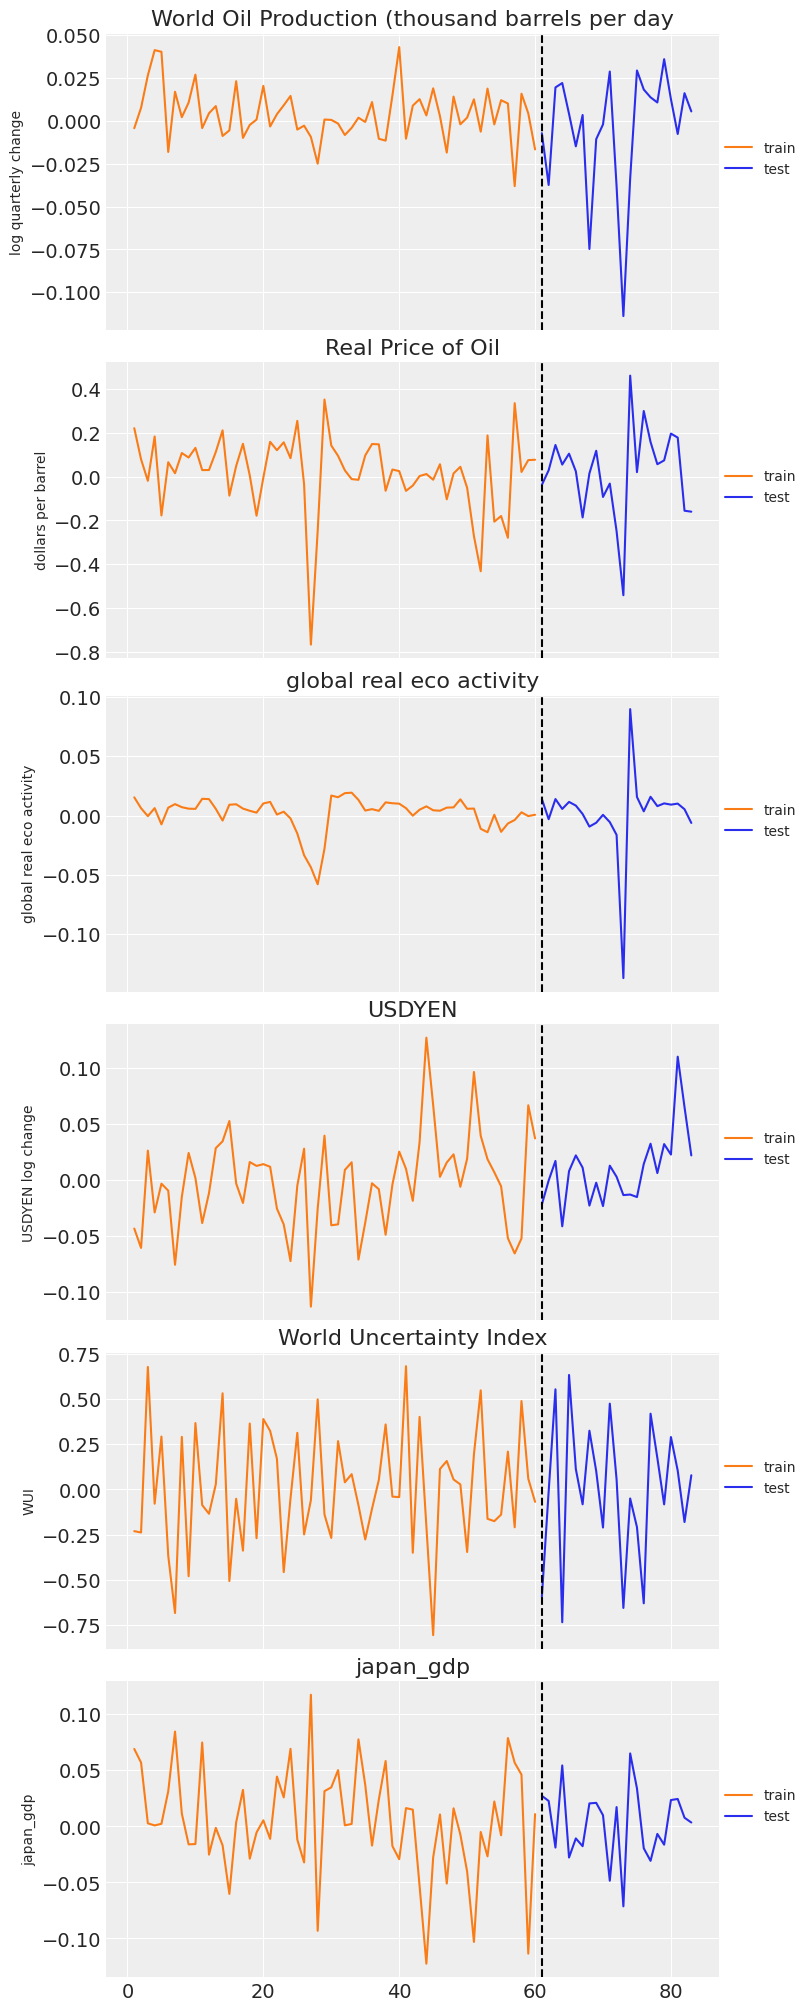

In [119]:
_, ax = plt.subplots(6, 1, figsize=(8, 20), sharex=True)
ax[0].plot(train_data[train_data.columns[0]], color="C1", label="train")
ax[0].plot(test_data[test_data.columns[0]], color="C0", label="test")
ax[0].set_ylabel("log quarterly change", fontsize=10)
ax[0].set_title("World Oil Production (thousand barrels per day")

ax[1].plot(train_data[train_data.columns[1]], color="C1", label="train")
ax[1].plot(test_data[test_data.columns[1]], color="C0", label="test")
ax[1].set_ylabel("dollars per barrel", fontsize=10)
ax[1].set_title("Real Price of Oil")

ax[2].plot(train_data[train_data.columns[2]], color="C1", label="train")
ax[2].plot(test_data[test_data.columns[2]], color="C0", label="test")
ax[2].set_ylabel("global real eco activity", fontsize=10)
ax[2].set_title("global real eco activity")

ax[3].plot(train_data[train_data.columns[3]], color="C1", label="train")
ax[3].plot(test_data[test_data.columns[3]], color="C0", label="test")
ax[3].set_ylabel("USDYEN log change", fontsize=10)
ax[3].set_title("USDYEN")

ax[4].plot(train_data[train_data.columns[4]], color="C1", label="train")
ax[4].plot(test_data[test_data.columns[4]], color="C0", label="test")
ax[4].set_ylabel("WUI", fontsize=10)
ax[4].set_title("World Uncertainty Index")

ax[5].plot(train_data[train_data.columns[5]], color="C1", label="train")
ax[5].plot(test_data[test_data.columns[5]], color="C0", label="test")
ax[5].set_ylabel("japan_gdp", fontsize=10)
ax[5].set_title("japan_gdp")

for axi in ax:
    axi.axvline(data.index[60], ls="--", color="k")
    axi.legend(loc=(1, 0.5), fontsize=10)

In [120]:
lags = 4

coords={
    "lags": reversed(range(-lags, 0)),
    "vars": ("World_oil_prod", "Real_price_oil",'glob_eco_act','usdyen',
             'wui', 'japan_gdp'),
    "cross_vars": ("World_oil_prod", "Real_price_oil",'glob_eco_act','usdyen',
             'wui', 'japan_gdp'),
    "time": range(len(train_data) - lags),
}

with pm.Model(coords=coords) as BVAR_model:
    # The first B bit:
    # Priors for the model intercept, lagged coefficients and noise terms
    intercept = pm.Normal("intercept", mu=0, sigma=0.1, dims=("vars",))
    lag_coefs = pm.Normal("lag_coefs", mu=0, sigma=0.1, dims=("lags", "vars", "cross_vars"))
    noise = pm.HalfNormal("noise", dims=("vars",))

    # The VAR bit:
    # Compute autoregressive expectation for each variable
    # We convolve the lagged coefficients of each variable with the whole dataset
    ar_oilprod= pm.math.sum([
        pm.math.sum(lag_coefs[i, 0] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0)        
    ar_realprice = pm.math.sum([
        pm.math.sum(lag_coefs[i, 1] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0)   
    ar_ecoact = pm.math.sum([
        pm.math.sum(lag_coefs[i, 2] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_usdyen = pm.math.sum([
        pm.math.sum(lag_coefs[i, 3] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_wui = pm.math.sum([
        pm.math.sum(lag_coefs[i, 4] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    ar_japangdp = pm.math.sum([
        pm.math.sum(lag_coefs[i, 5] * train_data.values[lags-(i+1): -(i+1)], axis=-1)
        for i in range(lags)
    ], axis=0) 
    # Stack autoregressive terms and add intercepts
    mean = intercept + pm.math.stack([ar_oilprod, ar_realprice, ar_ecoact, ar_usdyen, ar_wui,  ar_japangdp], axis=-1)

    # The second B bit:
    # For modelling simplicity, we ignore the first observations, where we could
    # not observe the effects of all the lagged coefficients
    obs = pm.Normal("obs", mu=mean, sigma=noise, observed=train_data[lags:], dims=("time", "vars"))

In [121]:
with BVAR_model:
    trace = pm.sample(chains=2, random_seed=100)

array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'lag_coefs'}>,
        <Axes: title={'center': 'lag_coefs'}>],
       [<Axes: title={'center': 'noise'}>,
        <Axes: title={'center': 'noise'}>]], dtype=object)

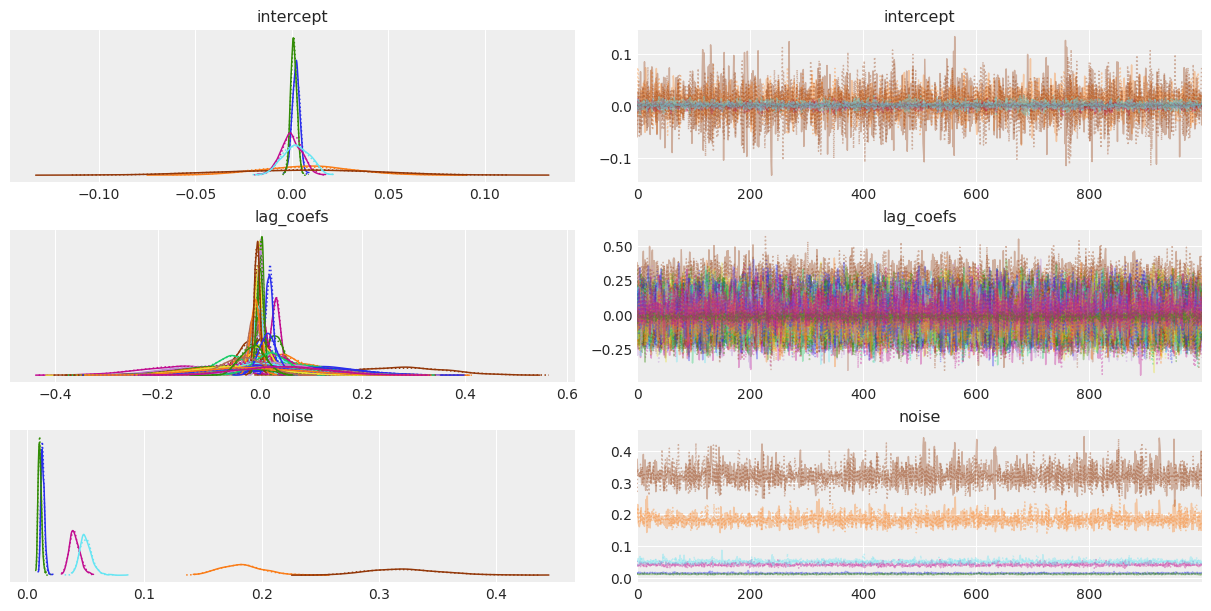

In [122]:
az.plot_trace(trace)

In [123]:
(az.summary(trace)).to_csv("/content/drive/MyDrive/ae/summary_japan.csv")

In [124]:
# Take a random subset of 100 draws from the posterior
draws = rng.integers(1000, size=100)

post = trace.posterior.stack(sample=("chain", "draw"))
intercept_draws = post["intercept"].values.T[draws]

lag_coefs_draws = post["lag_coefs"].values.T[draws].T
lag_coefs_draws = np.moveaxis(lag_coefs_draws, -1, 0)

noise_draws = post["noise"].values.T[draws]

intercept_draws.shape, lag_coefs_draws.shape, noise_draws.shape

((100, 6), (100, 4, 6, 6), (100, 6))

In [125]:
# Function that takes a single draw of parameters and forecasts n steps
def _forecast(intercept, lag_coefs, noise, forecast=24):
  
    len_data = len(train_data)
    new_draws = np.zeros((train_data.shape[0]+forecast, train_data.shape[1]))
    # Fill the new array with the observed data
    new_draws[:len_data] = train_data[:]
    for i in range(forecast):
        ar_oilprod = np.sum(lag_coefs[:, 0] * new_draws[len_data+i-lags: len_data+i])
        ar_realprice = np.sum(lag_coefs[:, 1] * new_draws[len_data+i-lags: len_data+i])
        ar_ecoact = np.sum(lag_coefs[:, 2] * new_draws[len_data+i-lags: len_data+i])
        ar_usdyen = np.sum(lag_coefs[:, 3] * new_draws[len_data+i-lags: len_data+i])
        ar_wui = np.sum(lag_coefs[:, 4] * new_draws[len_data+i-lags: len_data+i])
        ar_japangdp = np.sum(lag_coefs[:, 5] * new_draws[len_data+i-lags: len_data+i])
        mean = intercept + np.stack([ar_oilprod, ar_realprice, ar_ecoact, ar_usdyen, ar_wui,ar_japangdp])
        new_draws[len_data+i] = rng.normal(mean, noise)
    # Replace all observed data with nan, so they don't show when we plot it
    new_draws[:-forecast-1] = np.nan
    
    return new_draws

# Vectorized forecast function to handle multiple parameter draws
forecast = np.vectorize(
    _forecast,
    signature=("(v),(l,v,v),(v)->(o,v)"),
    excluded=("forecast",),
)

In [126]:
# Forecast 23 quarters into the future
ppc_draws = forecast(intercept_draws, lag_coefs_draws, noise_draws, forecast=23)
ppc_draws = np.swapaxes(ppc_draws, 0, 1)
ppc_draws.shape


(83, 100, 6)

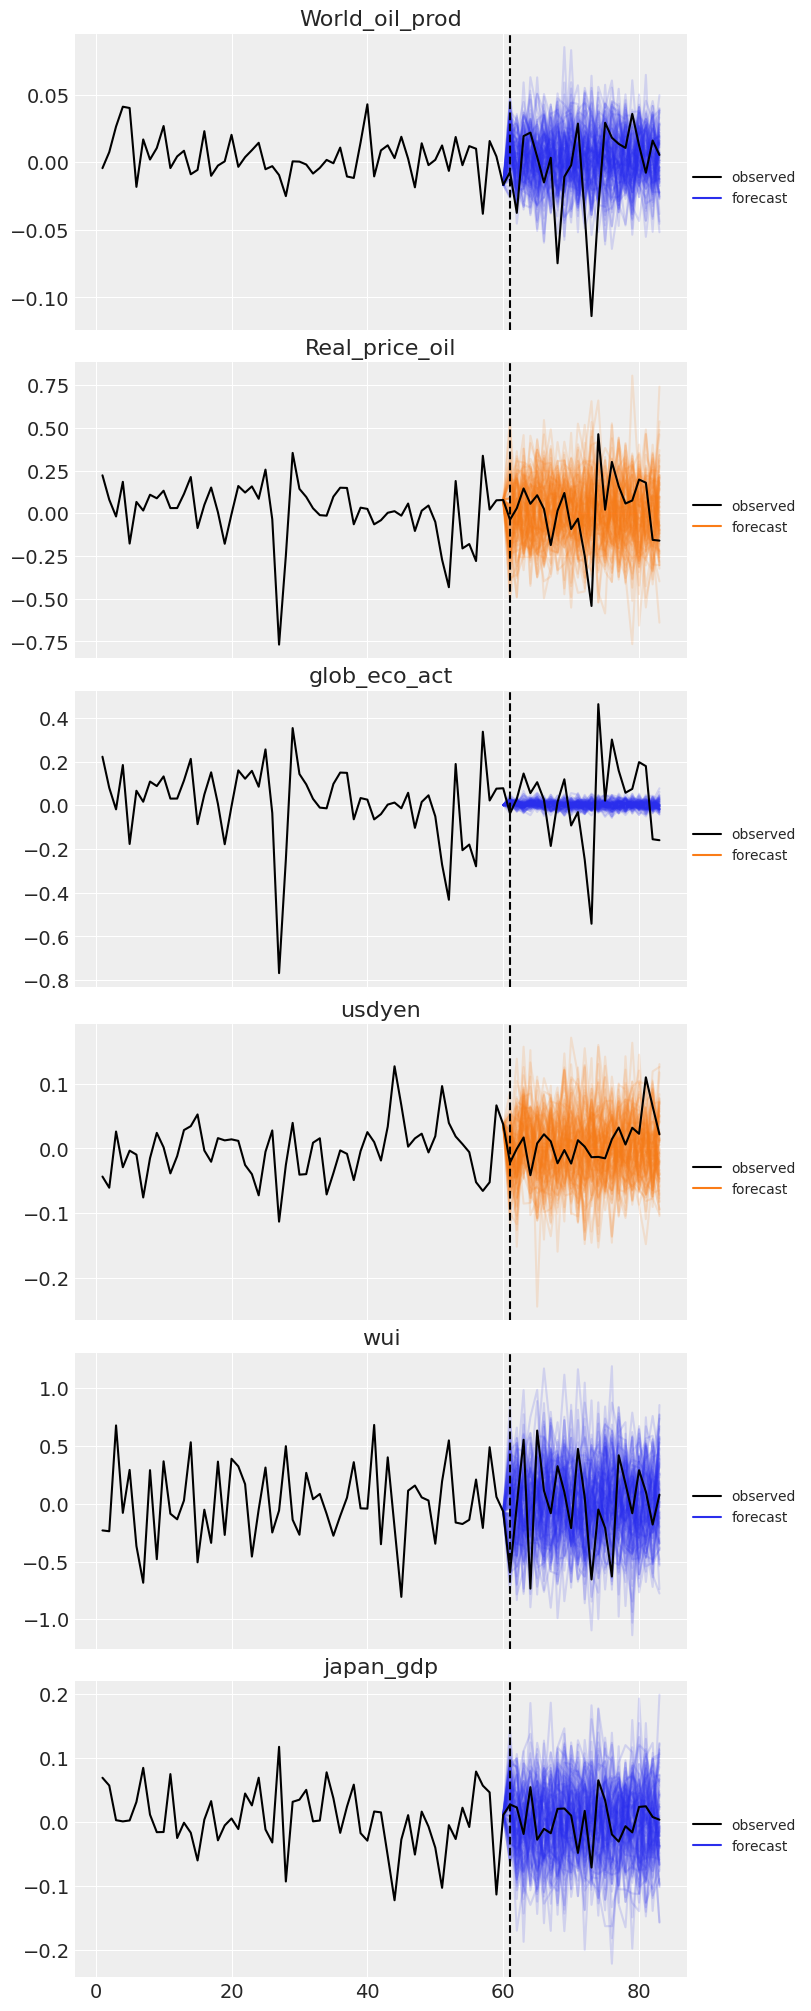

In [127]:
_, ax = plt.subplots(6, 1, sharex=True, figsize = (8,20))

ax[0].set_title('World_oil_prod')
ax[0].plot(data.index, ppc_draws[..., 0], color="C0", alpha=0.15)
ax[0].plot(data['World_oil_prod'], color="k", label="observed")
ax[0].plot([], color="C0", label="forecast")

ax[1].set_title('Real_price_oil')
ax[1].plot(data.index, ppc_draws[..., 1], color="C1", alpha=0.15)
ax[1].plot(data["Real_price_oil"], color="k", label="observed")
ax[1].plot([], color="C1", label="forecast")

ax[2].set_title('glob_eco_act')
ax[2].plot(data.index, ppc_draws[..., 2], color="C0", alpha=0.15)
ax[2].plot(data["Real_price_oil"], color="k", label="observed")
ax[2].plot([], color="C1", label="forecast")

ax[3].set_title('usdyen')
ax[3].plot(data.index, ppc_draws[..., 3], color="C1", alpha=0.15)
ax[3].plot(data["usdyen"], color="k", label="observed")
ax[3].plot([], color="C1", label="forecast")

ax[4].set_title('wui')
ax[4].plot(data.index, ppc_draws[..., 4], color="C0", alpha=0.15)
ax[4].plot(data["wui"], color="k", label="observed")
ax[4].plot([], color="C0", label="forecast")

ax[5].set_title('japan_gdp')
ax[5].plot(data.index, ppc_draws[..., 5], color="C0", alpha=0.15)
ax[5].plot(data["japan_gdp"], color="k", label="observed")
ax[5].plot([], color="C0", label="forecast")

for axi in ax:
    axi.axvline(test_data.index[0], ls="--", color="k")
    axi.legend(fontsize=10, loc=(1, .4))